# IMPORT MODULES

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


## Data Used

The project used the no-show dataset.Use the points below as reference and data catalogue.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
1.    ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2.    ● ‘Neighborhood’ indicates the location of the hospital.
3.    ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian     welfare program Bolsa Família.
 4.   ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Loading Data

In [4]:
data = pd.read_csv('noshow.csv',index_col=False)

In [5]:
# data head
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


## ANALYSIS GUIDELINES
    1.Does gender play a role in the no show?
    
    2.What is the relationship between age and no-show? 
    
    3. Does age-group add on this effect?
    
    4. What is the relationship between neighborhood and:
        >scholarship,alcoholism,hipertension
        
    5. Did the factors in question 4 affect the patient show up?

In [7]:
data.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
data['PatientId'].dtype

dtype('float64')

In [10]:
data['AppointmentID'].dtype

dtype('int64')

In [11]:
# It is best practice to have patient ID's as strings
print(data['PatientId'].dtype)
data['PatientId'] = data['PatientId'].astype(str)
data['PatientId'].dtype
data['AppointmentID'].dtype
data['AppointmentID'] = data['AppointmentID'].astype(str)
data['AppointmentID'].dtype

float64


dtype('O')

In [12]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#Checking for nulls

In [14]:
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [15]:
# there are no nulls in the provided data

In [16]:
#check for duplicates
data[data.duplicated(keep=False)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [17]:
data.shape

(110527, 14)

In [18]:
# there are no duplicates in the provided data

## Demographic Analysis

In [19]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:title={'center':'Attendance'}, ylabel='No-show'>

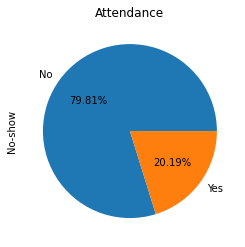

In [20]:
data['No-show'].value_counts(normalize=True).plot(kind = 'pie', title = "Attendance",autopct='%1.2f%%')

In [21]:
gender = data['Gender'].value_counts()
gender

F    71840
M    38687
Name: Gender, dtype: int64

In [22]:
app = data['No-show'].value_counts()
app

No     88208
Yes    22319
Name: No-show, dtype: int64

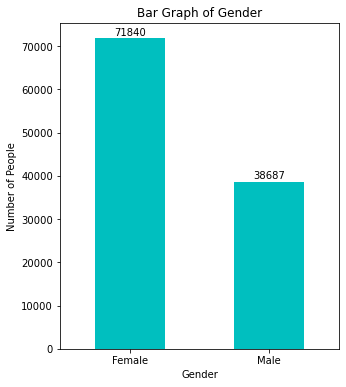

In [38]:
gender = data['Gender'].value_counts()
plt.figure(figsize=(5, 6))
ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Female', 'Male'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

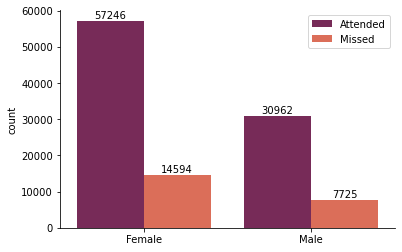

In [24]:
df_app = data.groupby('AppointmentID')[['No-show', 'Gender']].first()
# give names to the values in the columns
df_app = df_app.replace({'Gender': {'M': 'Male', 'F': 'Female'}, 'No-show': {'No': 'Attended', 'Yes': 'Missed'}})
# show counts per Gender and Attendance
ax = sns.countplot(data=df_app, x='Gender', hue='No-show', palette='rocket')
ax.legend(title='')  # remove title, as it is clear from the legend items
ax.set_xlabel('')
for bars in ax.containers:
    ax.bar_label(bars)
# ax.margins(y=0.1)  # make some extra space for the labels
ax.locator_params(axis='y', integer=True)
sns.despine()
plt.show()

In [42]:
57246/(14594+57246)
#30962/(30962+7725)

0.7968541202672605

In [25]:
df_app.keys()

Index(['No-show', 'Gender'], dtype='object')

<AxesSubplot:title={'center':'Attendance'}, ylabel='No-show'>

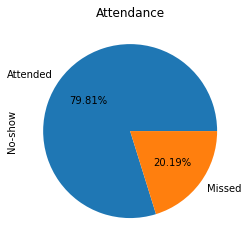

In [26]:
df_app['No-show'].value_counts(normalize=True).plot(kind = 'pie', title = "Attendance",autopct='%1.2f%%')

In [27]:
df_age = data.groupby('AppointmentID')[['No-show','Age', 'Gender']].first()

In [28]:
df_age.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [ ]:
binning 

Binning the age into age groups

In [32]:
bins= [10,20,30,40,50,100]
labels = ['Child','Teen','Adult','Senior','Elder']
df_age['AgeGroup'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
df_age = df_age.replace({'Gender': {'M': 'Male', 'F': 'Female'}, 'No-show': {'No': 'Attended', 'Yes': 'Missed'}})

In [ ]:
#data.loc[(data.Age < 13),  'AgeGroup'] = 'Child'

In [33]:
df_age.head(3)

,No-show,Age,Gender,AgeGroup
AppointmentID,,,,
5030230,Attended,51,Female,Elder
5122866,Missed,34,Male,Adult
5134197,Missed,27,Female,Teen


<AxesSubplot:title={'center':'Demographic Distribution'}, ylabel='AgeGroup'>

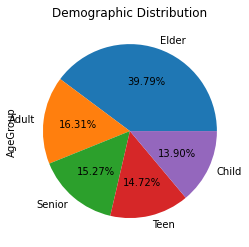

In [37]:
df_age['AgeGroup'].value_counts(normalize=True).plot(kind = 'pie', title = "Demographic Distribution",autopct='%1.2f%%')

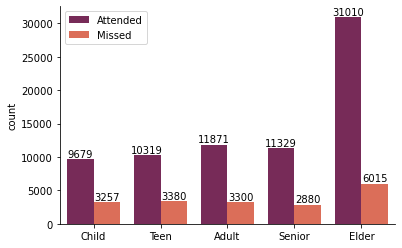

In [34]:
# show counts per Gender and Attendance
ax = sns.countplot(data=df_age, x='AgeGroup', hue='No-show', palette='rocket')
ax.legend(title='')  # remove title, as it is clear from the legend items
ax.set_xlabel('')
for bars in ax.containers:
    ax.bar_label(bars)
# ax.margins(y=0.1)  # make some extra space for the labels
ax.locator_params(axis='y', integer=True)
sns.despine()
plt.show()

<AxesSubplot:title={'center':'Demographic Distribution'}, ylabel='AgeGroup'>

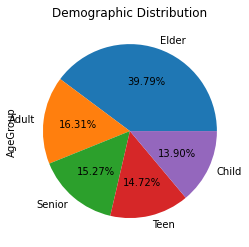

In [36]:
df_hood = 

# DATA INSIGHTS

There tracked metrics and dimensions have given a brief dive into the dataset. This is to answer the questions such as effects of age on attendance,effects narrowed down to particular age groups,neighbourhoods and gender.
This can be broken into demographics analysis,diagnosis analysis and technological. The focus so far has been on the demographics- age,location.
The diagnosis could be related to the hipertension,diabetes,with technological being the sms.

**Demographic**
There are more females in the data as compared to the male, number of females who missed doubled that of male.Male had 80% attendance and female 79%. There are factors that influence the females to miss. Could this be staying at home? responsibilities?..more can be asked.
The population had more 'adults' making 39% of the data.


# Further Analysis

Further analysis will be done on this dataset to look into this dataset including time series analysis to see the effects of the booking dates on attendance. Using machine learining techniques,in particular the binary classifiers, the no-show as target column can be used to predict whether  patient will attend or miss based on the features.
The notebook will have more updates.

# REFERENCES
    1.NA